In [1]:
import os
os.chdir(os.path.join(os.getcwd(),'..'))

In [2]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
stage_in = lambda x: x[6:7]
age_in = lambda x: int(x[-2:])

In [4]:
from services import DataReader

X, y = DataReader().read_analyze_solution('bc_averaging_disease_analysis#k=0')

In [5]:
_, y = DataReader().read_data('BC', True)

In [6]:
import numpy as np
from itertools import groupby

freq = {key:len(list(group)) for key, group in groupby(np.sort(y))}

freq

{'1': 19, '2': 50, '3': 49, '4': 20, 'h': 76}

In [7]:
from preprocessing import DynamicPreprocessing

# pre = DynamicPreprocessing(['flux-diff', 'feature-selection','pathway-scoring', 'transport-elimination'])
pre = DynamicPreprocessing(['flux-diff', 'pathway-scoring', 'transport-elimination'])
X_pre = pre.fit_transform(X, y)

In [8]:
from sklearn.feature_selection import f_classif, VarianceThreshold
from sklearn.feature_extraction import DictVectorizer
from preprocessing import *

X_not_h, y_not_h = list(zip(*filter(lambda x: x[1] != 'h', zip(X_pre, y))))

vect = DictVectorizer()
vt = VarianceThreshold(0.1)
inv_vect = InverseDictVectorizer(vect, vt)

X_not_h_vect = vt.fit_transform(vect.fit_transform(X_not_h), y_not_h)

X_not_h = inv_vect.fit_transform(X_not_h_vect.todense()) 

(F_not, pval_not) = f_classif(X_not_h_vect, y_not_h)

In [9]:
df_not_h = pd.DataFrame().from_records(X_not_h)

df_not_h['categories'] = y_not_h
df_not_h = df_not_h.groupby('categories').mean().T

df_not_h['F_val'] = F_not
df_not_h['p_val'] = pval_not

In [11]:
df_not_h.sort_values('F_val', ascending=False).round(5)

categories,1,2,3,4,F_val,p_val
Folate metabolism_dif,97.26772,-5.75032,-6.94192,36.09383,11.35930,0.00000
Purine synthesis_dif,73.21196,-265.41458,-248.33103,-209.76979,7.07628,0.00019
Biotin metabolism_dif,-343.64054,122.21527,14.49492,-159.43001,3.69895,0.01346
Urea cycle_dif,48.91754,-12.04996,-27.60176,-49.98541,3.24106,0.02418
Lysine metabolism_dif,-82.99751,1.50123,149.36872,109.81435,3.09615,0.02911
Fatty acid oxidation_dif,-11.06338,5.37158,4.61886,-0.29429,2.81018,0.04194
Methionine and cysteine metabolism_dif,259.07399,194.27210,165.42633,188.10838,2.74608,0.04551
Cholesterol metabolism_dif,-1.65167,24.88466,0.40005,24.80781,2.71200,0.04753
Glycosphingolipid metabolism_dif,2.94552,-0.20641,-0.57110,-0.72626,2.66907,0.05020
"Glycine, serine, alanine and threonine metabolism_dif",4.89783,-109.64664,-101.28245,-105.98522,2.51428,0.06112


In [15]:
df_not_h[(df_not_h['p_val'] <= 0.05)].sort_values('F_val', ascending=False)

categories,1,2,3,4,F_val,p_val
Folate metabolism_dif,97.267722,-5.750319,-6.941918,36.093834,11.359299,0.000001
Purine synthesis_dif,73.211962,-265.414585,-248.331031,-209.769792,7.076281,0.000189
Biotin metabolism_dif,-343.640537,122.215265,14.494916,-159.430011,3.698948,0.013460
Urea cycle_dif,48.917538,-12.049964,-27.601756,-49.985411,3.241061,0.024183
Lysine metabolism_dif,-82.997512,1.501234,149.368720,109.814351,3.096153,0.029107
Fatty acid oxidation_dif,-11.063382,5.371577,4.618862,-0.294287,2.810178,0.041937
Methionine and cysteine metabolism_dif,259.073988,194.272105,165.426327,188.108378,2.746081,0.045508
Cholesterol metabolism_dif,-1.651666,24.884659,0.400050,24.807814,2.711995,0.047528


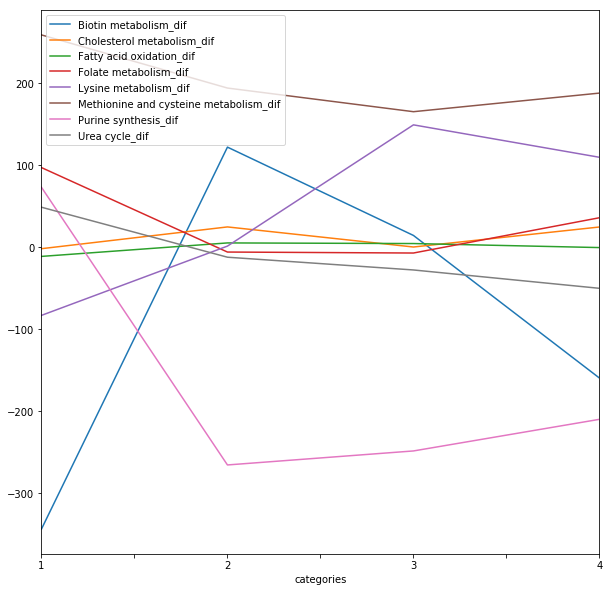

In [10]:
df_not_h[(df_not_h['p_val'] <= 0.05)][['1','2','3','4']].T.plot(kind='line', figsize=(10, 10))